In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import random
from shapely.geometry import Point, MultiPoint
pd.set_option('display.max_rows', 100)

In [2]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_shp/sp_pop_shp.shp')

In [3]:
sp_shp

CLASSID     FEATID  REVISIONNU           NOME_DIST SIGLA_DIST  COD_DIST  \
0       4.0  8583485.0         1.0      JOSE BONIFACIO        JBO        47   
1       4.0  8583484.0         1.0         JD SAO LUIS        JDS        46   
2       4.0  8583445.0         1.0         ARTUR ALVIM        AAL         5   
3       4.0  8583479.0         1.0             JAGUARA        JAG        40   
4       4.0  8583437.0         1.0       VILA PRUDENTE        VPR        93   
5       4.0  8583480.0         1.0             JAGUARE        JRE        41   
6       4.0  8583481.0         1.0             JARAGUA        JAR        42   
7       4.0  8583482.0         1.0           JD HELENA        JDH        44   
8       4.0  8583483.0         1.0         JD PAULISTA        JDP        45   
9       4.0  8583486.0         1.0             LAJEADO        LAJ        96   
10      4.0  8583487.0         1.0                LAPA        LAP        48   
11      4.0  8583488.0         1.0           LIBERDADE        LIB        49   
12      4.0  8583489.0         1.0               LIMAO        LIM        50   
13      4.0  8583436.0         1.0       VILA MEDEIROS        VMD        92   
14      4.0  8583438.0         1.0           JD ANGELA        JDA        43   
15      4.0  8583439.0         1.0         PARELHEIROS        PLH        55   
16      4.0  8583440.0         1.0          VILA SONIA        VSO        94   
17      4.0  8583441.0         1.0           AGUA RASA        ARA         1   
18      4.0  8583442.0         1.0   ALTO DE PINHEIROS        API         2   
19      4.0  8583443.0         1.0          ANHANGUERA        ANH         3   
20      4.0  8583444.0         1.0          ARICANDUVA        ARI         4   
21      4.0  8583446.0         1.0         BARRA FUNDA        BFU         6   
22      4.0  8583447.0         1.0          BELA VISTA        BVI         7   
23      4.0  8583448.0         1.0               BELEM        BEL         8   
24      4.0  8583449.0         1.0          BOM RETIRO        BRE         9   
25      4.0  8583450.0         1.0                BRAS        BRS        10   
26      4.0  8583451.0         1.0         BRASILANDIA        BRL        11   
27      4.0  8583452.0         1.0             BUTANTA        BUT        12   
28      4.0  8583453.0         1.0        CACHOEIRINHA        CAC        13   
29      4.0  8583454.0         1.0             CAMBUCI        CMB        14   
30      4.0  8583455.0         1.0          CAMPO BELO        CBE        15   
31      4.0  8583456.0         1.0        CAMPO GRANDE        CGR        16   
32      4.0  8583457.0         1.0         CAMPO LIMPO        CLM        17   
33      4.0  8583458.0         1.0            CANGAIBA        CNG        18   
34      4.0  8583459.0         1.0       CAPAO REDONDO        CRE        19   
35      4.0  8583460.0         1.0              CARRAO        CAR        20   
36      4.0  8583461.0         1.0          CASA VERDE        CVE        21   
37      4.0  8583462.0         1.0          CID ADEMAR        CAD        22   
38      4.0  8583463.0         1.0           CID DUTRA        CDU        23   
39      4.0  8583464.0         1.0           CID LIDER        CLD        24   
40      4.0  8583465.0         1.0      CID TIRADENTES        CTI        25   
41      4.0  8583466.0         1.0          CONSOLACAO        CON        26   
42      4.0  8583467.0         1.0             CURSINO        CUR        27   
43      4.0  8583468.0         1.0  ERMELINO MATARAZZO        ERM        28   
44      4.0  8583469.0         1.0      FREGUESIA DO O        FRE        29   
45      4.0  8583470.0         1.0              GRAJAU        GRA        30   
46      4.0  8583471.0         1.0          GUAIANASES        GUA        31   
47      4.0  8583472.0         1.0            IGUATEMI        IGU        33   
48      4.0  8583473.0         1.0            IPIRANGA        IPI        34   
49      4.0  8583474.0         1.0          ITAIM BIBI

In [7]:
# Create an empty dataframe
pop_simulated = pd.DataFrame()

# For each district, generate a lat long based on pop
for index, row in sp_shp.iterrows():
    pointsx = []
    pointsy = []
    minx, miny, maxx, maxy = row["geometry"].bounds
    while len(pointsx) < row['pop_maio_1']*0.001:
        x = random.uniform(minx, maxx)
        y = random.uniform(miny, maxy)
        pnt = Point(x, y)
        if row["geometry"].contains(pnt):
            pointsx.append(x)
            pointsy.append(y)
    df = pd.DataFrame(
        {'x': pointsx, 'y': pointsy}
    ) 
    pop_simulated = pop_simulated.append(df)

In [10]:
pop_simulated

x             y
0   354059.516919  7.395925e+06
1   354315.031555  7.393267e+06
2   353720.158093  7.392719e+06
3   354980.903555  7.391642e+06
4   353342.290437  7.392303e+06
..            ...           ...
46  332540.375263  7.395015e+06
47  332532.146300  7.394453e+06
48  333255.885581  7.395693e+06
49  332264.533817  7.395150e+06
50  331835.911025  7.395402e+06

[8969 rows x 2 columns]

In [8]:
gdf = gpd.GeoDataFrame(pop_simulated, geometry=gpd.points_from_xy(pop_simulated.x, pop_simulated.y), crs=sp_shp.crs)
print(gdf)

                x             y                        geometry
0   354934.584707  7.390871e+06  POINT (354934.585 7390871.153)
1   354236.028780  7.394751e+06  POINT (354236.029 7394750.505)
2   353983.029371  7.395575e+06  POINT (353983.029 7395574.749)
3   352645.938823  7.393420e+06  POINT (352645.939 7393419.641)
4   352632.584908  7.394049e+06  POINT (352632.585 7394049.357)
..            ...           ...                             ...
46  333139.911862  7.395533e+06  POINT (333139.912 7395532.731)
47  332187.502040  7.395441e+06  POINT (332187.502 7395440.850)
48  332233.984088  7.395878e+06  POINT (332233.984 7395878.316)
49  332622.553144  7.394578e+06  POINT (332622.553 7394578.424)
50  333190.147489  7.396160e+06  POINT (333190.147 7396160.173)

[8969 rows x 3 columns]


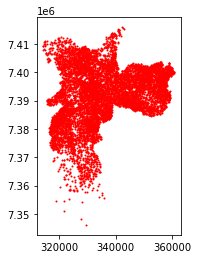

In [9]:
gdf.plot(marker='o', color='red', markersize=1);

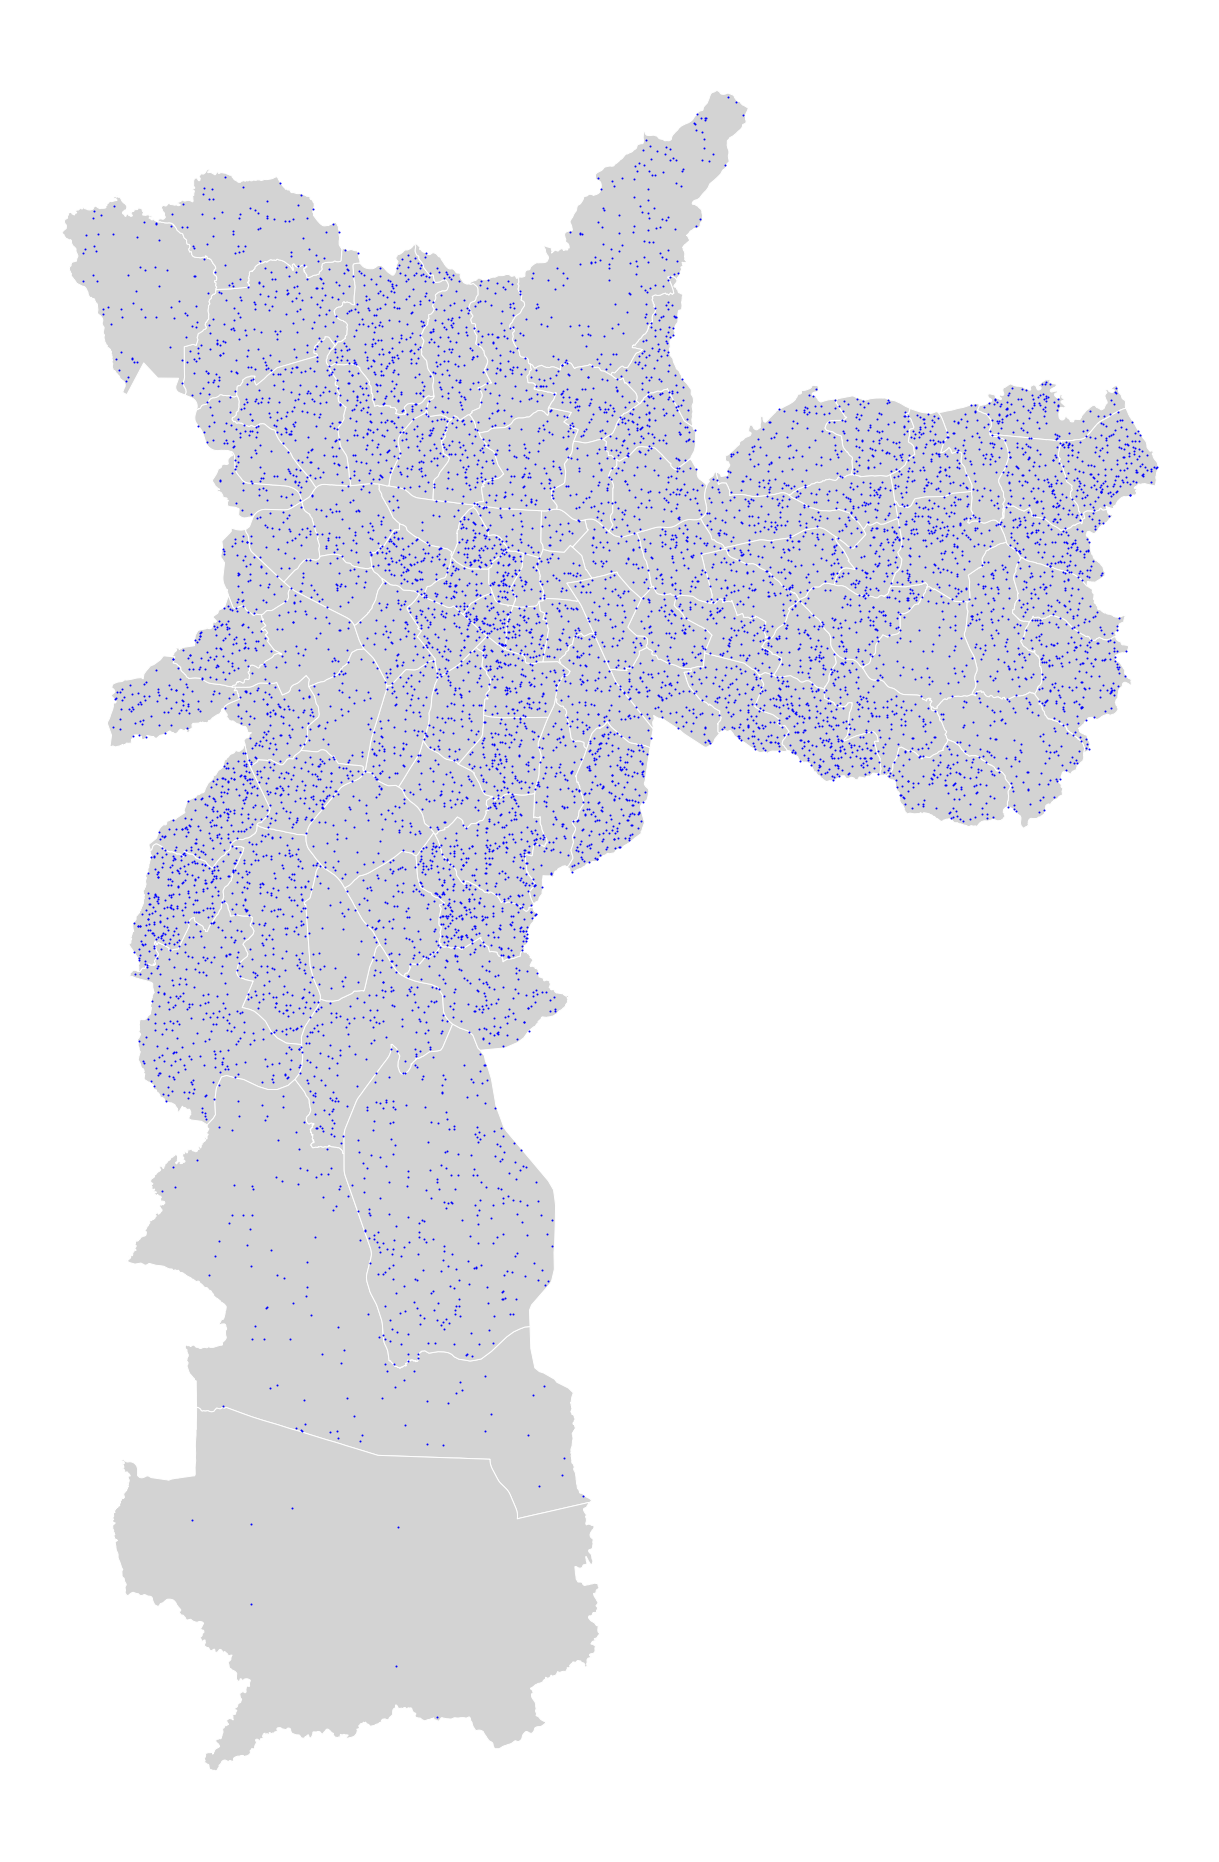

In [10]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
gdf.plot(ax=ax, color='blue', markersize=1)

ax.axis("off")
plt.show()

In [3]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [4]:
# Set crs to use degrees in the first moment
# https://gis.stackexchange.com/questions/345071/matching-x-and-y-axis-coordinates-of-two-geopandas-geometries-to-overlay-them
gdf_agencias_sp_points = gpd.GeoDataFrame(gdf_agencias_sp, geometry=gpd.points_from_xy(gdf_agencias_sp['lon'], gdf_agencias_sp['lat']), crs=4326)

In [5]:
sp_shp.crs

{'init': 'epsg:29193'}

In [6]:
# Then, set the crs of points to the crs of shapefile map which is in meters
gdf_agencias_sp_points = gdf_agencias_sp_points.to_crs(sp_shp.crs)

C:\Users\Ricardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
within_sp = gdf_agencias_sp_points[gdf_agencias_sp_points.geometry.within(sp_shp.geometry.unary_union)]

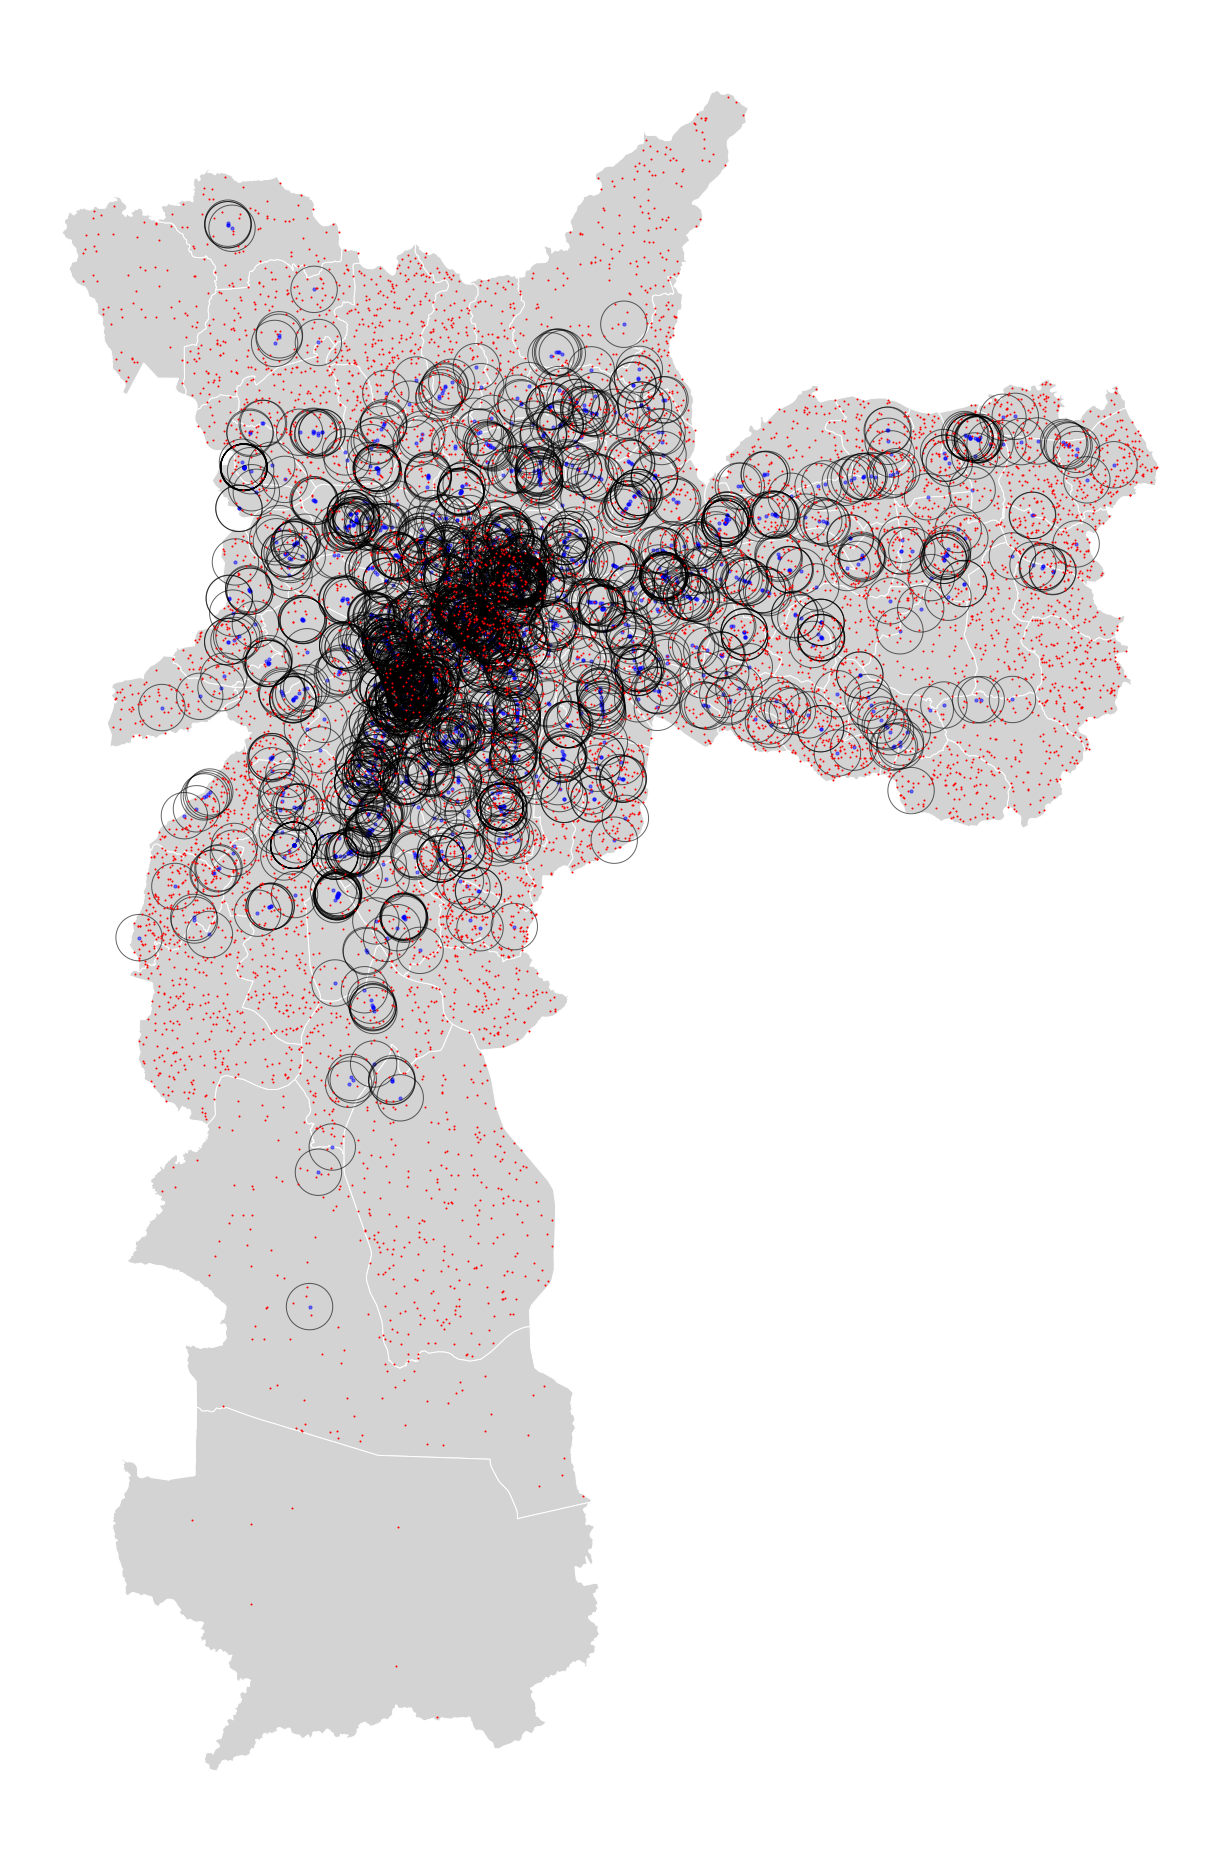

In [15]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot polygons
sp_shp.plot(ax=ax, facecolor='lightgrey', edgecolor="white")

# Plot points
within_sp.plot(ax=ax, color='blue', markersize=10, alpha=0.5)
within_sp.geometry.buffer(1000).plot(ax=ax, alpha=0.6, edgecolor='black', facecolor='none')
gdf.plot(ax=ax, color='red', markersize=1)

ax.axis("off")
plt.show()

In [27]:
#within_sp.geometry.buffer(1000).unary_union
sp_shp.columns

Index(['CLASSID', 'FEATID', 'REVISIONNU', 'NOME_DIST', 'SIGLA_DIST',
       'COD_DIST', 'COD_SUB', 'DATA_CRIAC', 'USUARIO_ID', 'distrito_x',
       'pop_maior_', 'distrito_y', 'pop_maio_1', 'geometry'],
      dtype='object')

In [32]:
# Create an empty dataframe
result = pd.DataFrame()

for index, row in sp_shp.iterrows():
    # Getting pop inside district
    within_district = gdf[gdf.geometry.within(row.geometry)]
    
    # Getting agencies inside district
    within_agencies = within_sp[within_sp.geometry.within(row.geometry)]
    
    # Getting pop inside buffer
    within_pop = within_district[within_district.geometry.within(within_agencies.geometry.buffer(1000).unary_union)]
    #print(within_district.shape[0], within_pop.shape[0])

    df = pd.DataFrame(
        {'pop_total': within_district.shape[0], 'pop_buffer': within_pop.shape[0], 'nome_distrito':row.NOME_DIST, 'cod_distrito':row.COD_DIST}, index=[0]
    ) 
    result = result.append(df)
    

In [34]:
result['perc_atendimento'] = result.pop_buffer/result.pop_total

In [35]:
result

pop_total  pop_buffer       nome_distrito  cod_distrito  perc_atendimento
0        103           7      JOSE BONIFACIO            47          0.067961
0        216          92         JD SAO LUIS            46          0.425926
0         78          35         ARTUR ALVIM             5          0.448718
0         19          10             JAGUARA            40          0.526316
0         83          72       VILA PRUDENTE            93          0.867470
0         42          34             JAGUARE            41          0.809524
0        155          42             JARAGUA            42          0.270968
0         96          45           JD HELENA            44          0.468750
0         76          76         JD PAULISTA            45          1.000000
0        124          36             LAJEADO            96          0.290323
0         55          52                LAPA            48          0.945455
0         59          59           LIBERDADE            49          1.000000
0         60          48               LIMAO            50          0.800000
0         94          75       VILA MEDEIROS            92          0.797872
0        238          14           JD ANGELA            43          0.058824
0        108          11         PARELHEIROS            55          0.101852
0         93          48          VILA SONIA            94          0.516129
0         66          64           AGUA RASA             1          0.969697
0         35          24   ALTO DE PINHEIROS             2          0.685714
0         63           0          ANHANGUERA             3          0.000000
0         67          43          ARICANDUVA             4          0.641791
0         13          13         BARRA FUNDA             6          1.000000
0         60          60          BELA VISTA             7          1.000000
0         37          30               BELEM             8          0.810811
0         29          29          BOM RETIRO             9          1.000000
0         25          25                BRAS            10          1.000000
0        199          38         BRASILANDIA            11          0.190955
0         44          39             BUTANTA            12          0.886364
0        106          47        CACHOEIRINHA            13          0.443396
0         32          32             CAMBUCI            14          1.000000
0         51          51          CAMPO BELO            15          1.000000
0         84          66        CAMPO GRANDE            16          0.785714
0        168          53         CAMPO LIMPO            17          0.315476
0        104          33            CANGAIBA            18          0.317308
0        214         153       CAPAO REDONDO            19          0.714953
0         68          57              CARRAO            20          0.838235
0         66          64          CASA VERDE            21          0.969697
0        209         166          CID ADEMAR            22          0.794258
0        151          40           CID DUTRA            23          0.264901
0        101          27           CID LIDER            24          0.267327
0        167           0      CID TIRADENTES            25          0.000000
0         50          49          CONSOLACAO            26          0.980000
0         90          62             CURSINO            27          0.688889
0         88          56  ERMELINO MATARAZZO            28          0.636364
0        108          76      FREGUESIA DO O            29          0.703704
0        277          10              GRAJAU            30          0.036101
0         79          28          GUAIANASES            31          0.354430
0        106          23            IGUATEMI            33          0.216981
0         88          77            IPIRANGA            34          0.875000
0         80          80          ITAIM BIBI            35          1.000000
0        169         100      ITAIM PAULISTA            36          0.591716

In [36]:
sp_shp_agg = sp_shp.merge(result, how='left',left_on='COD_DIST', right_on='cod_distrito')

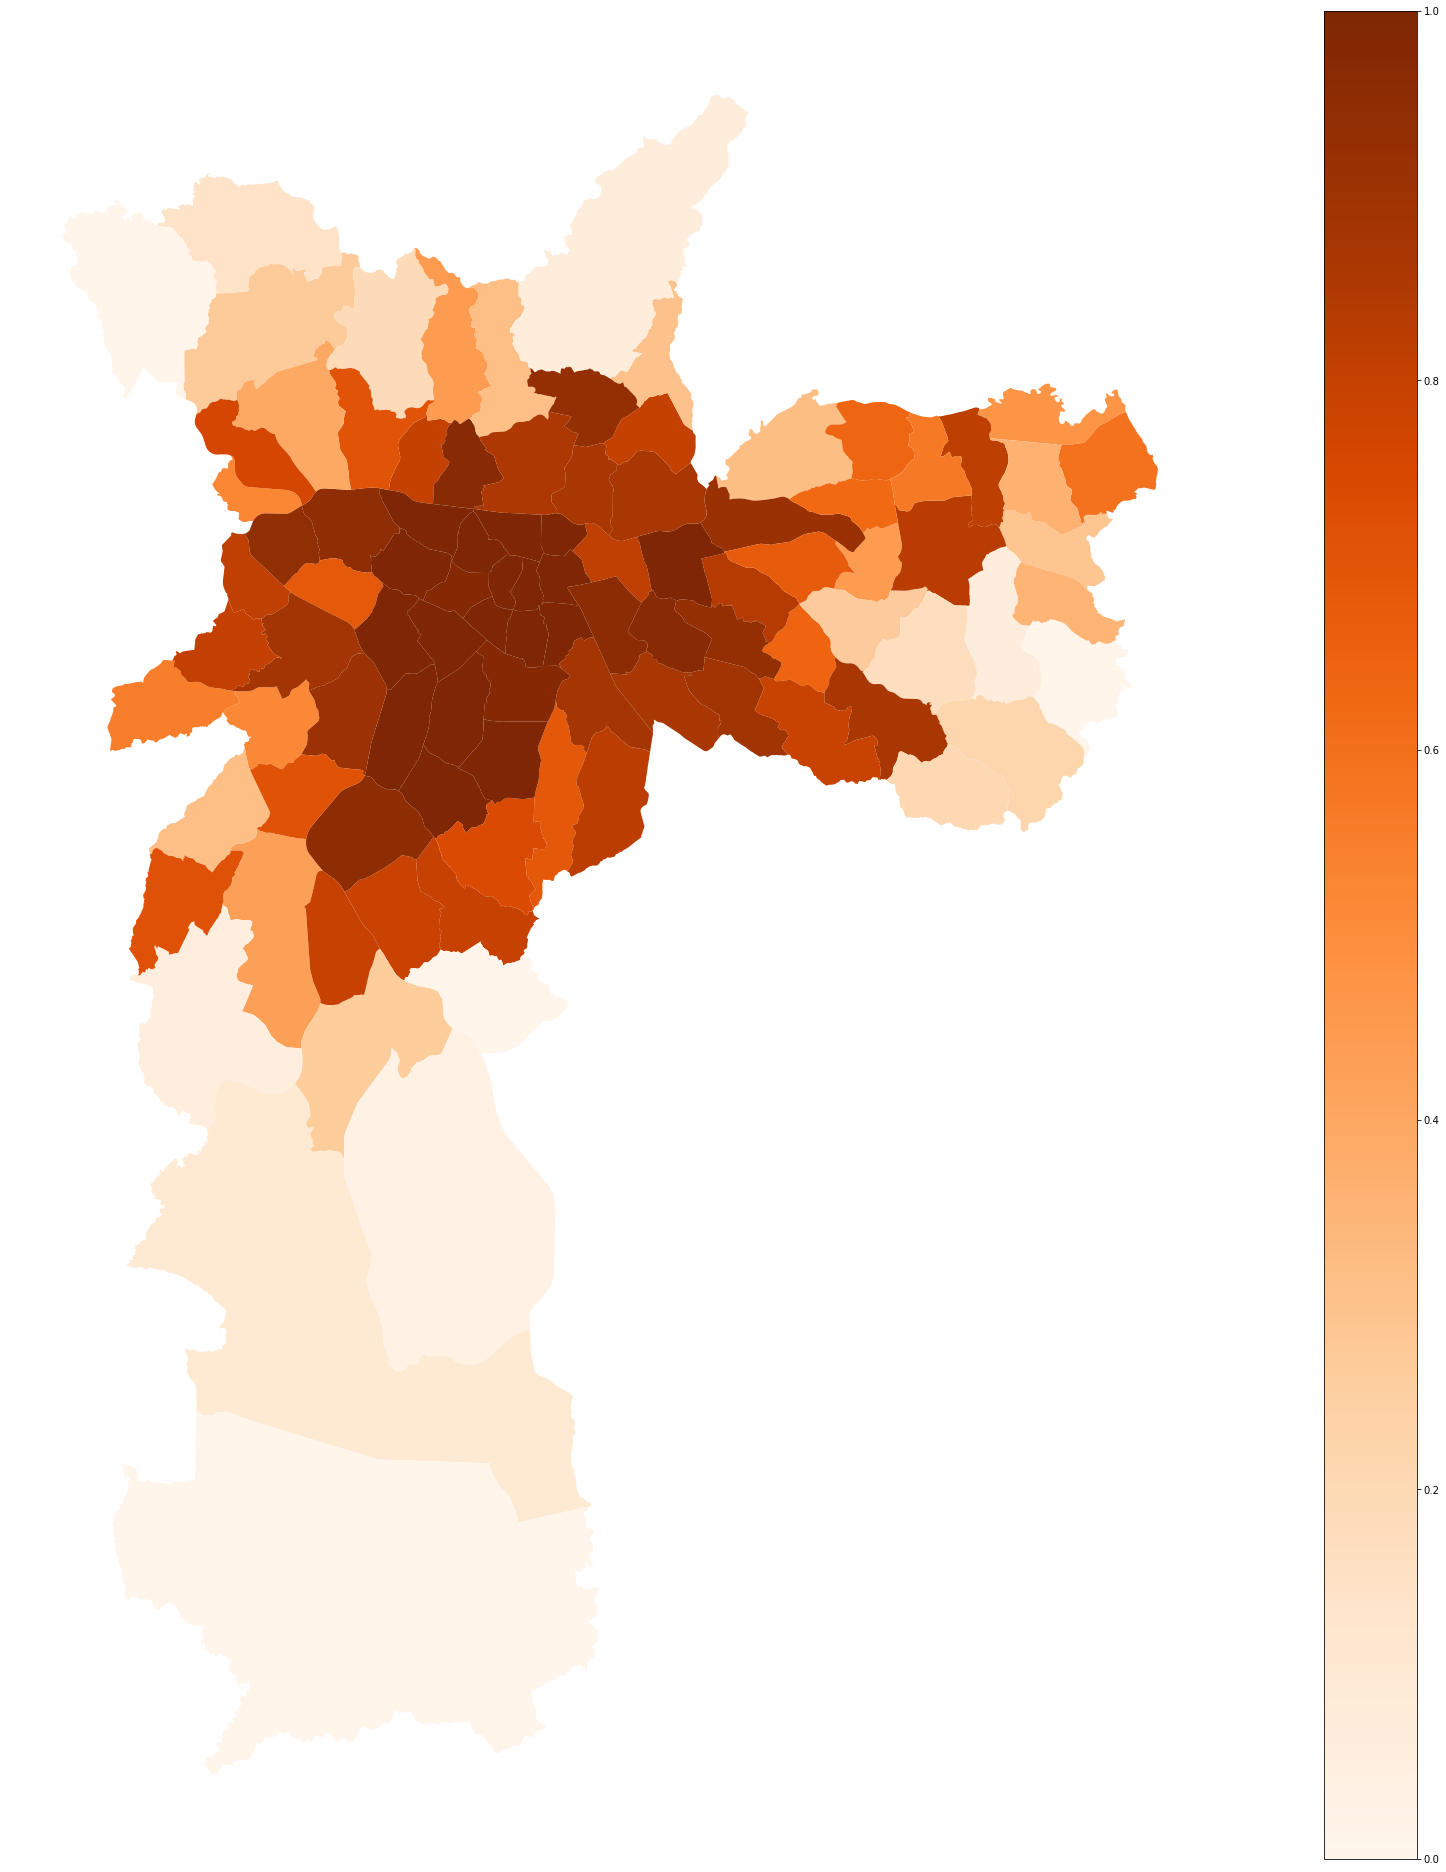

In [37]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot
sp_shp_agg.plot(column='perc_atendimento', cmap="Oranges", legend=True, ax=ax)

ax.axis("off")
plt.show()